# 01. Importing libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# This command propts matplotlib visuals to appear in the notebook 

%matplotlib inline

# 02. Data types

In [3]:
path = r'C:\Users\Kozole\Desktop\CF Kurs\Excercise\6\World University Rankings'

In [4]:
df = pd.read_csv(os.path.join(path, '02 Data', 'Prepared Data', 'cwurData_3.csv'), index_col = False)

In [5]:
df.shape

(2200, 17)

In [6]:
df.head(5)

,Unnamed: 0,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,score_flag,continent,country_count
0,0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Excellent,North America,573
1,1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Excellent,North America,573
2,2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Excellent,North America,573
3,3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Excellent,Europe,144
4,4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Excellent,North America,573


# 03. Task 6.4

In [7]:
# Dropping column Unnamed: 0

df = df.drop(columns = ['Unnamed: 0'])

In [8]:
df.shape

(2200, 16)

In [9]:
df.head(5)

,world_rank,institution,country,national_rank,quality_of_education,alumni_employment,quality_of_faculty,publications,influence,citations,patents,score,year,score_flag,continent,country_count
0,1,Harvard University,USA,1,7,9,1,1,1,1,5,100.00,2012,Excellent,North America,573
1,2,Massachusetts Institute of Technology,USA,2,9,17,3,12,4,4,1,91.67,2012,Excellent,North America,573
2,3,Stanford University,USA,3,17,11,5,4,2,2,15,89.50,2012,Excellent,North America,573
3,4,University of Cambridge,United Kingdom,1,10,24,4,16,16,11,50,86.17,2012,Excellent,Europe,144
4,5,California Institute of Technology,USA,4,2,29,7,37,22,22,18,85.21,2012,Excellent,North America,573


In [10]:
# Check for missing values

df.isnull().sum()

world_rank              0
institution             0
country                 0
national_rank           0
quality_of_education    0
alumni_employment       0
quality_of_faculty      0
publications            0
influence               0
citations               0
patents                 0
score                   0
year                    0
score_flag              0
continent               0
country_count           0
dtype: int64

In [11]:
# No missing values to handle

In [12]:
# Checking for duplicated values

dups = df.duplicated()
dups.shape

(2200,)

In [13]:
# There are no duplicated values

C:\Users\Kozole\AppData\Local\Temp\ipykernel_37740\1198151330.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['score'], bins=25)


<Axes: xlabel='score', ylabel='Density'>

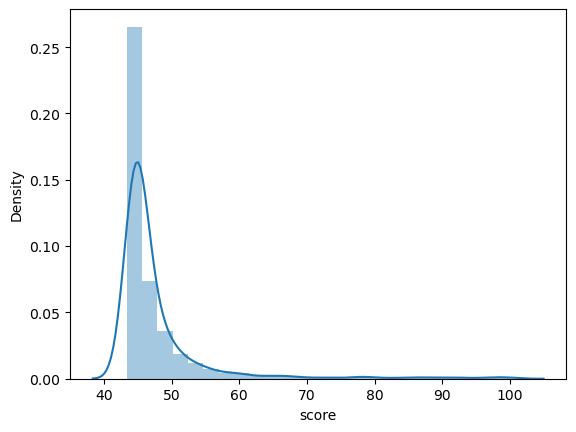

In [14]:
# Extreme values check 

sns.distplot(df['score'], bins=25)

In [15]:
# Check the mean 

df['score'].mean()

47.79839545454546

In [16]:
# Check median 

df['score'].median()

45.1

In [17]:
# Check the max

df['score'].max()

100.0

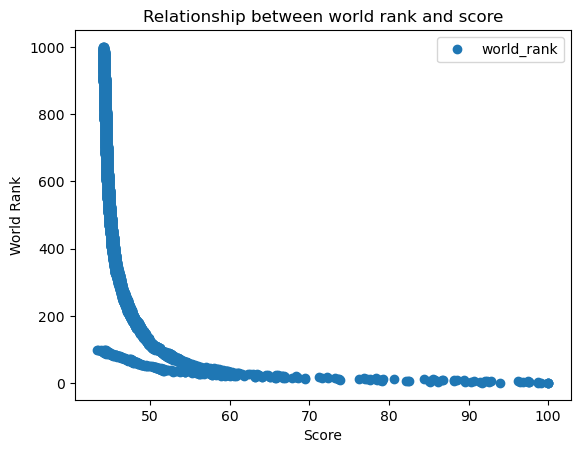

In [18]:
# Create a scatterplot

df.plot(x = 'score', y= 'world_rank', style = 'o')
plt.title ("Relationship between world rank and score")
plt.xlabel('Score')
plt.ylabel('World Rank')
plt.show()

In [19]:
# Filtering the DataFrame to remove rows where 'year' is 2012 or 2013 (in these years we have rankings only for the firs 100 Universities)

df_filtered = df[(df['year'] != 2012) & (df['year'] != 2013)]

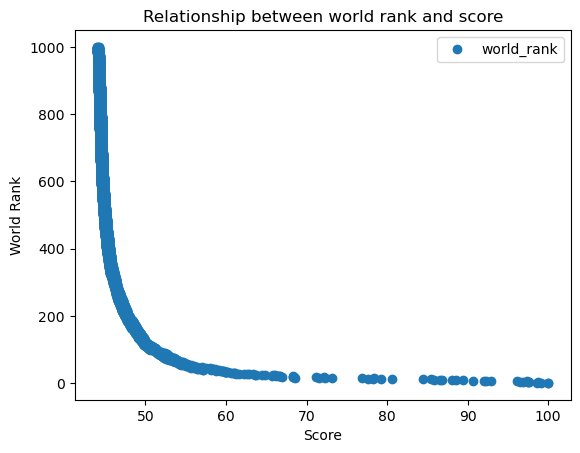

In [20]:
# Create a scatterplot

df_filtered.plot(x = 'score', y= 'world_rank', style = 'o')
plt.title ("Relationship between world rank and score")
plt.xlabel('Score')
plt.ylabel('World Rank')
plt.show()

# Hypothesis-The higher the score of the University has the higher its World Ranking will be (closer to 1)

In [21]:
# Reshape the variables into NumPy arrays and put them into separate objects.

X = df_filtered['score'].values.reshape(-1,1)
y = df_filtered['world_rank'].values.reshape(-1,1)

In [23]:
X

array([[100.  ],
       [ 99.09],
       [ 98.69],
       ...,
       [ 44.03],
       [ 44.02],
       [ 44.02]])

In [24]:
y

array([[   1],
       [   2],
       [   3],
       ...,
       [ 998],
       [ 999],
       [1000]], dtype=int64)

In [25]:
# Split data into a training set and a test set.

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [26]:
# Create a regression object.

regression = LinearRegression()

In [27]:
# Fit the regression object onto the training set.

regression.fit(X_train, y_train)

LinearRegression()

In [28]:
# Predict the values of y using X.

y_predicted = regression.predict(X_test)

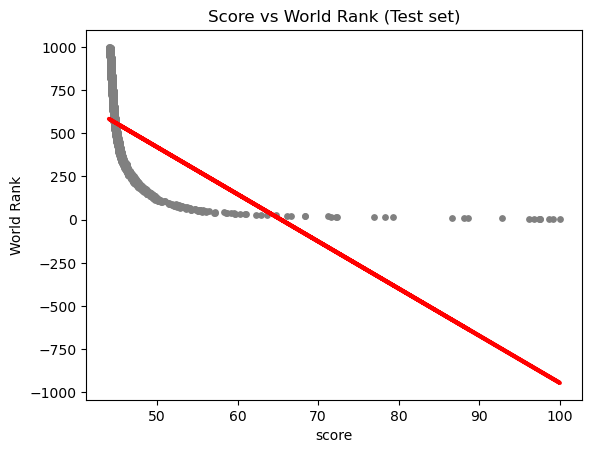

In [29]:
# Create a plot that shows the regression line from the model on the test set.

plot_test = plt
plot_test.scatter(X_test, y_test, color='gray', s = 15)
plot_test.plot(X_test, y_predicted, color='red', linewidth =3)
plot_test.title('Score vs World Rank (Test set)')
plot_test.xlabel('score')
plot_test.ylabel('World Rank')
plot_test.show()

# Write your own interpretation of how well the line appears to fit the data in a markdown cell.

## We can immediately see that the linear regression line is much too far from the data points and it even does in to negative values of the World rank and that is not good in predicting the World rank values.

In [30]:
# Create objects that contain the model summary statistics.

rmse = mean_squared_error(y_test, y_predicted) 
r2 = r2_score(y_test, y_predicted)

In [31]:
# Print the model summary statistics. 

print('Slope:' ,regression.coef_)
print('Mean squared error: ', rmse)
print('R2 score: ', r2)

Slope: [[-27.30736766]]
Mean squared error:  60459.28042189239
R2 score:  0.28262978948920303


In [32]:
# Create a dataframe comparing the actual and predicted values of y.

data = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_predicted.flatten()})
data.head(30)

,Actual,Predicted
0,406,542.616773
1,191,483.905932
2,133,438.848776
3,732,567.466477
4,755,575.931761
5,179,475.440648
6,534,565.281888
7,304,531.420752
8,858,579.208646
9,19,-158.090281


# Include your thoughts on how well the model performed on the test set in a markdown cell

## We have a slope coefficient that is -27 so that means that we have a negative relationship. The slope here means that as Score rises (as the distance from a metro station rises), the Word rank slightly at a degree of 27 and in this case is something that we are looking for. The root mean squared error is very large with a value of 60459 and the R2 score for the model is only 28%. When we compare the values for the Actual and the predicted values of the World rankings, we can see that there is an enormous difference in the numbers. As we know that the world ranking is determined by the score we can not conclude that the hypothesis is false but that linear regression is not suitable for this case.